In [1]:
%run utils.py
%run plots.py
%run parameters.py

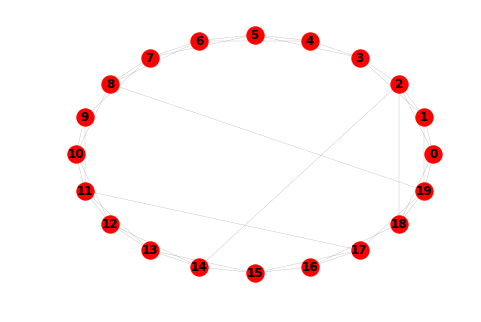

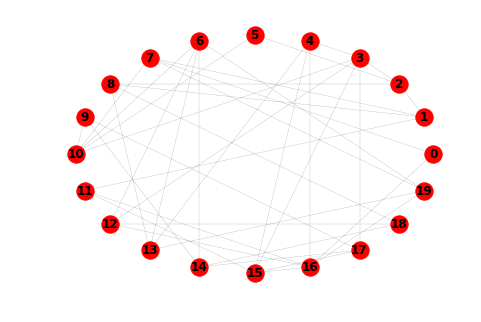

In [2]:
import copy
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# select probabilities test case
probs = probability_tests["test9"]

# select graph parameters
graph_params = copy.copy(graph_parameters)

# generate training and test samples
graphs_train, labels_train, graphs_test, labels_test = generate_dataset(probs, graph_params, True)

In [3]:
f = open('/Users/alanli/Google Drive/UofT/ECE2500 - Project/code/graph2vec/simgraph.Labels','w')

graph_type = graph_params["graph_type"]
graphs_per_class = graph_params["graphs_per_class"]
num_nodes = graph_params["num_nodes"]
knn = graph_params["knn"]
m_edges = graph_params["m_edges"]
gamma = graph_params["gamma"]

idx = 0
# generate training and test graphs
for class_type, prob in enumerate(probs):
    for i in range(graphs_per_class):
        G_train = generate_graph(num_nodes, prob, knn, m_edges, gamma, graph_type=graph_type)
        G_test = generate_graph(num_nodes, prob, knn, m_edges, gamma, graph_type=graph_type)
#         graphs_train.append(G_train)
#         graphs_test.append(G_test)
        labels_train.append(str(prob))
        labels_test.append(str(prob))
        nx.write_gexf(G_train, "/Users/alanli/Google Drive/UofT/ECE2500 - Project/code/graph2vec/data/train_{}.gexf".format(idx))
        f.write("train_{}.gexf ".format(idx)+str(class_type)+"\n")
        nx.write_gexf(G_test, "/Users/alanli/Google Drive/UofT/ECE2500 - Project/code/graph2vec/data/test_{}.gexf".format(idx))
        f.write("test_{}.gexf ".format(idx)+str(class_type)+"\n")       
        idx += 1
f.close()

In [ ]:
# import json
# from pprint import pprint

# data = json.load(open('/Users/alanli/Downloads/graph2vec_tf/embeddings/simgraph_dims_20_epochs_100_lr_0.3_embeddings.txt'))

# print(list(data.items())[0])

# # for key, value in data.iteritems():
# #     temp = [key,value]
# #     dictlist.append(temp)

In [ ]:
# graph2vec



train_X = 
test_X = 

assert train_X.shape[0] == len(graphs_train), "train_X shape is not correct"
assert test_X.shape[0] == len(graphs_test), "train_X shape is not correct"

train_labels = np.array(labels_train)
test_labels = np.array(labels_test)
train_X, train_labels = unison_shuffled_copies(train_X, train_labels)
test_X, test_labels = unison_shuffled_copies(test_X, test_labels)

In [ ]:
%run classify.py

In [ ]:
# select model
model = classifiers["svm"]
parameters = parameters_search["svm"]
clf = GridSearchCV(model, parameters)

# PCA
pca = PCA(n_components=0.99)
train_X_pca = pca.fit_transform(train_X)
test_X_pca = pca.transform(test_X)

# Training session 1
print(">>> no PCA")
clf.fit(train_X, train_labels)
train_predictions = clf.predict(train_X).reshape(-1,1)
test_predictions = clf.predict(test_X).reshape(-1,1)
print_results(np.ravel(train_predictions), train_labels, "Train Accuracy")
print_results(np.ravel(test_predictions), test_labels, "Test Accuracy")
print("best score: {} | best params: {}".format(clf.best_score_, clf.best_params_))

# Training session 2
print("\n>>> no PCA - log degree")
clf.fit(np.log(train_X+1), train_labels)
train_predictions = clf.predict(np.log(train_X+1)).reshape(-1,1)
test_predictions = clf.predict(np.log(test_X+1)).reshape(-1,1)
print_results(np.ravel(train_predictions), train_labels, "Train Accuracy")
print_results(np.ravel(test_predictions), test_labels, "Test Accuracy")
print("best score: {} | best params: {}".format(clf.best_score_, clf.best_params_))

# Training session 3
print("\n>>> PCA with 99% variance retained")
clf.fit(train_X_pca, train_labels)
train_predictions = clf.predict(train_X_pca).reshape(-1,1)
test_predictions = clf.predict(test_X_pca).reshape(-1,1)
print_results(np.ravel(train_predictions), train_labels, "Train Accuracy")
print_results(np.ravel(test_predictions), test_labels, "Test Accuracy")
print("best score: {} | best params: {}".format(clf.best_score_, clf.best_params_))